In [1]:
#Add Madplotlib magic command
%matplotlib inline
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
citydatatoload = "Resources/city_data.csv"
ridedatatoload = "Resources/ride_data.csv"

In [3]:
#read the city data file and store it in a pandas DF.
citydata_df = pd.read_csv(citydatatoload)
#citydata_df.head(10)

In [4]:
#Read the ride data file and store it in a pandas DF
ridedata_df = pd.read_csv(ridedatatoload)
#ridedata_df.head(10)

In [5]:
#Get the columns and rows that are not null.
citydata_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#Or get the sum of the columns that are null.
citydata_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#Get the data types of each column.
citydata_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#Or use .info()
citydata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [9]:
#Get the unique values of the type of city.
citydata_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
sum(citydata_df["type"]=="Urban")

66

In [11]:
sum(citydata_df["type"]=="Suburban")

36

In [12]:
sum(citydata_df["type"]=="Rural")

18

In [13]:
#sample DF for counts
citydata_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [14]:
#Inspect Ride Data DF
#Get columns and rows that are not null.
ridedata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [15]:
#Sum columns and rows that are null.
ridedata_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
#Merge the data into a single DF
pyberdata_df = pd.merge(ridedata_df, citydata_df, how="left", on=["city","city"])
#Display the DF
pyberdata_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create the Urban city DataFrame
urbancities_df = pyberdata_df[pyberdata_df["type"] == "Urban"]
#urbancities_df.head()

In [18]:
# Create the Suburban and Rural city DataFrames
suburbancities_df = pyberdata_df[pyberdata_df["type"] == "Suburban"]
#suburbancities_df.head()
ruralcities_df = pyberdata_df[pyberdata_df["type"] == "Rural"]
#ruralcities_df.head()

In [19]:
# Get the number of rides for urban cities.
urbanridecount = urbancities_df.groupby(["city"]).count()["ride_id"]
urbanridecount.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
#Get the number of rides for other city types.
suburbanridecount = suburbancities_df.groupby(["city"]).count()["ride_id"]
ruralridecount = ruralcities_df.groupby(["city"]).count()["ride_id"]


In [21]:
# Get average fare for each city in the urban cities.
urbanavgfare = urbancities_df.groupby(["city"]).mean()["fare"]
urbanavgfare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [22]:
# Get average fare for each city in the suburban and rural cities.
suburbanavgfare = suburbancities_df.groupby(["city"]).mean()["fare"]
ruralavgfare = ruralcities_df.groupby(["city"]).mean()["fare"]


In [23]:
# Get the average number of drivers for each urban city.
urbandrvcount = urbancities_df.groupby(["city"]).mean()["driver_count"]
urbandrvcount.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [24]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburbandrvcount = suburbancities_df.groupby(["city"]).mean()["driver_count"]
ruraldrvcount = ruralcities_df.groupby(["city"]).mean()["driver_count"]


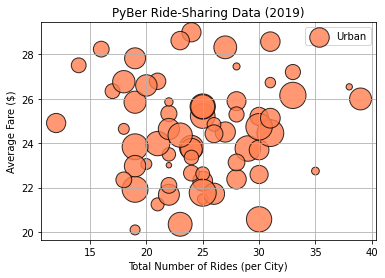

In [25]:
# Build the scatter plots for urban cities.
plt.scatter(urbanridecount, urbanavgfare, s=10*urbandrvcount,
           c="coral", edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per City)")
plt.grid(True)
plt.legend()

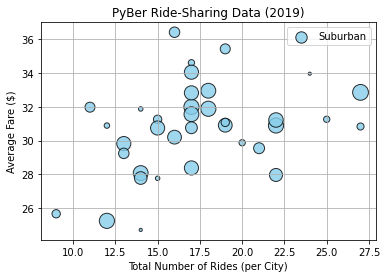

In [26]:
# Build the scatter plots for suburban cities.
plt.scatter(suburbanridecount, suburbanavgfare, s=10*suburbandrvcount,
           c="skyblue", edgecolor="black", linewidths=1,
           alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per City)")
plt.grid(True)
plt.legend()

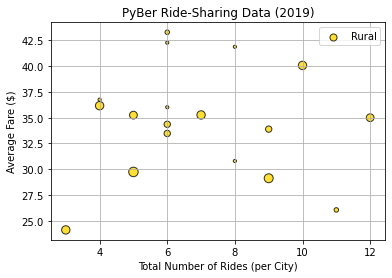

In [27]:
# Build the scatter plots for rural cities.
plt.scatter(ruralridecount, ruralavgfare, s=10*ruraldrvcount,
           c="gold", edgecolor="black", linewidths=1,
           alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per City)")
plt.grid(True)
plt.legend()

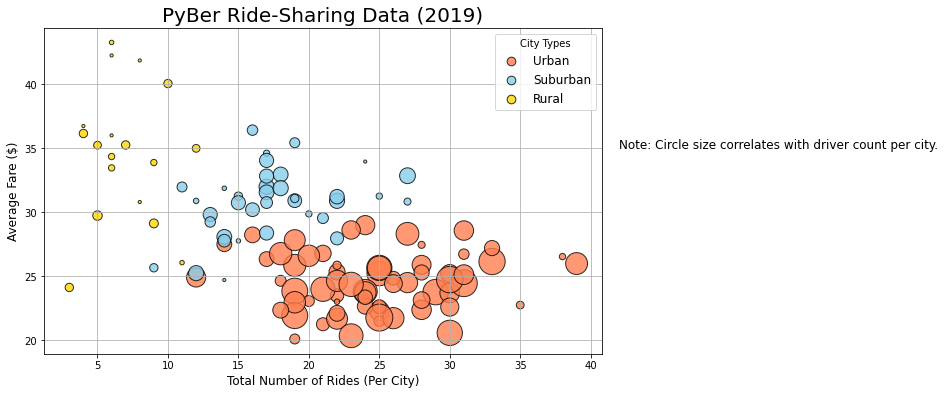

In [28]:
#Change the figure size.
plt.subplots(figsize=(10,6))
#Combine into one plot.
plt.scatter(urbanridecount, urbanavgfare, s=10*urbandrvcount,
           c="coral", edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")
plt.scatter(suburbanridecount, suburbanavgfare, s=10*suburbandrvcount,
           c="skyblue", edgecolor="black", linewidths=1,
           alpha=0.8, label="Suburban")
plt.scatter(ruralridecount, ruralavgfare, s=10*ruraldrvcount,
           c="gold", edgecolor="black", linewidths=1,
           alpha=0.8, label="Rural")

#Incorporate other graph properties.
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
leg = plt.legend(fontsize=12, mode="Expanded", scatterpoints=1, loc="best", title="City Types")
leg.legendHandles[0]._sizes = [75]
leg.legendHandles[1]._sizes = [75]
leg.legendHandles[2]._sizes = [75]

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize=12)

#Save the image.
plt.savefig("analysis/Fig1.png")

plt.show()

In [29]:
# Get summary statistics.
urbancities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [30]:
suburbancities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [31]:
ruralcities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [32]:
# Get summary statistics.
urbanridecount.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [33]:
suburbanridecount.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [34]:
ruralridecount.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [35]:
# Calculate the mean of the ride count for each city type.
round(urbanridecount.mean(),2), round(suburbanridecount.mean(), 2), round(ruralridecount.mean(),2)

(24.62, 17.36, 6.94)

In [36]:
# Calculate the median of the ride count for each city type.
round(urbanridecount.median(),2), round(suburbanridecount.median(),2), round(ruralridecount.median(),2)

(24.0, 17.0, 6.0)

In [37]:
# Calculate the mode of the ride count for the urban cities.
urbanridecount.mode()

0    22
1    25
dtype: int64

In [38]:
suburbanridecount.mode()

0    17
dtype: int64

In [39]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [40]:
# Calculate the measures of central tendency for the ride count for the urban cities.
meanurbanridecount = np.mean(urbanridecount)
print(f"The mean for the ride counts for urban trips is {meanurbanridecount:.2f}.")
medianurbanridecount = np.median(urbanridecount)
print(f"The median for the ride counts for urban trips is {medianurbanridecount:.2f}.")
modeurbanridecount = sts.mode(urbanridecount)
print(f"The mode for the ride counts for urban trips is {modeurbanridecount}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [41]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
meansuburbanridecount = np.mean(suburbanridecount)
print(f"The mean for the ride counts for urban trips is {meansuburbanridecount:.2f}.")
mediansuburbanridecount = np.median(suburbanridecount)
print(f"The median for the ride counts for urban trips is {mediansuburbanridecount:.2f}.")
modesuburbanridecount = sts.mode(suburbanridecount)
print(f"The mode for the ride counts for urban trips is {modesuburbanridecount}.")

The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 17.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [42]:
# Calculate the measures of central tendency for the ride count for the rural cities.
meanruralridecount = np.mean(ruralridecount)
print(f"The mean for the ride counts for urban trips is {meanruralridecount:.2f}.")
medianruralridecount = np.median(ruralridecount)
print(f"The median for the ride counts for urban trips is {medianruralridecount:.2f}.")
moderuralridecount = sts.mode(ruralridecount)
print(f"The mode for the ride counts for urban trips is {moderuralridecount}.")

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [43]:
# Get the fares for the urban cities.
urbanfares = urbancities_df["fare"]
urbanfares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [44]:
# Calculate the measures of central tendency for the average fare for the urban cities.
meanurbanfares = np.mean(urbanfares)
print(f"Mean Urban Fare Price is ${meanurbanfares:.2f}.")
medianurbanfares = np.median(urbanfares)
print(f"Median Urban Fare Price is ${medianurbanfares:.2f}.")
modeurbanfares = sts.mode(urbanfares)
print(f"The mode urban Fare Price is ${modeurbanfares}.")

Mean Urban Fare Price is $24.53.
Median Urban Fare Price is $24.64.
The mode urban Fare Price is $ModeResult(mode=array([22.86]), count=array([5])).


In [45]:
suburbanfares = suburbancities_df["fare"]
meansuburbanfares = np.mean(suburbanfares)
print(f"Mean Suburban Fare Price: ${meansuburbanfares:.2f}.")
mediansuburbanfares = np.median(suburbanfares)
print(f"Median Urban Fare Price is ${mediansuburbanfares:.2f}.")
modesuburbanfares = sts.mode(suburbanfares)
print(f"The mode urban Fare Price is ${modesuburbanfares}.")


ruralfares = ruralcities_df["fare"]
meanruralfares = np.mean(ruralfares)
print(f"Mean Rural Fare Price: ${meanruralfares:.2f}.")
medianruralfares = np.median(ruralfares)
print(f"Median Urban Fare Price is ${medianruralfares:.2f}.")
moderuralfares = sts.mode(ruralfares)
print(f"The mode urban Fare Price is ${moderuralfares}.")

Mean Suburban Fare Price: $30.97.
Median Urban Fare Price is $30.75.
The mode urban Fare Price is $ModeResult(mode=array([17.99]), count=array([3])).
Mean Rural Fare Price: $34.62.
Median Urban Fare Price is $37.05.
The mode urban Fare Price is $ModeResult(mode=array([37.05]), count=array([2])).


In [46]:
# Get the driver count data from the urban cities.
urbandrivers = urbancities_df["driver_count"]
#Calculate mean, median, and mode for urban
meanurbandrivers = np.mean(urbandrivers)
print(f"Mean Urban Driver Count is {meanurbandrivers:.2f}.")
medianurbandrivers = np.median(urbandrivers)
print(f"Median Urban Driver Count is {medianurbandrivers:.2f}.")
modeurbandrivers = sts.mode(urbandrivers)
print(f"The mode Urban Driver Count is {modeurbandrivers}.")

# Get the driver count data from the suburban cities.
suburbandrivers = suburbancities_df["driver_count"]
#Calculate mean, median, and mode for urban
meansuburbandrivers = np.mean(suburbandrivers)
print(f"Mean Suburban Driver Count is {meansuburbandrivers:.2f}.")
mediansuburbandrivers = np.median(suburbandrivers)
print(f"Median Suburban Driver Count is {mediansuburbandrivers:.2f}.")
modesuburbandrivers = sts.mode(suburbandrivers)
print(f"The mode Suburban Driver Count is {modesuburbandrivers}.")

# Get the driver count data from the rural cities.
ruraldrivers = ruralcities_df["driver_count"]
#Calculate mean, median, and mode for urban
meanruraldrivers = np.mean(ruraldrivers)
print(f"Mean Rural Driver Count is {meanruraldrivers:.2f}.")
medianruraldrivers = np.median(ruraldrivers)
print(f"Median Rural Driver Count is {medianruraldrivers:.2f}.")
moderuraldrivers = sts.mode(ruraldrivers)
print(f"The mode Rural Driver Count is {moderuraldrivers}.")

Mean Urban Driver Count is 36.68.
Median Urban Driver Count is 37.00.
The mode Urban Driver Count is ModeResult(mode=array([39], dtype=int64), count=array([86])).
Mean Suburban Driver Count is 13.71.
Median Suburban Driver Count is 16.00.
The mode Suburban Driver Count is ModeResult(mode=array([20], dtype=int64), count=array([79])).
Mean Rural Driver Count is 4.30.
Median Rural Driver Count is 4.00.
The mode Rural Driver Count is ModeResult(mode=array([1], dtype=int64), count=array([32])).


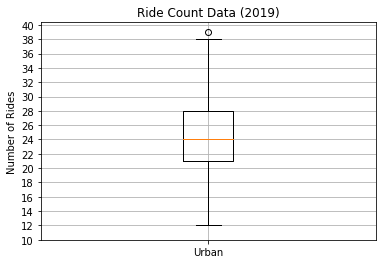

In [47]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urbanridecount, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

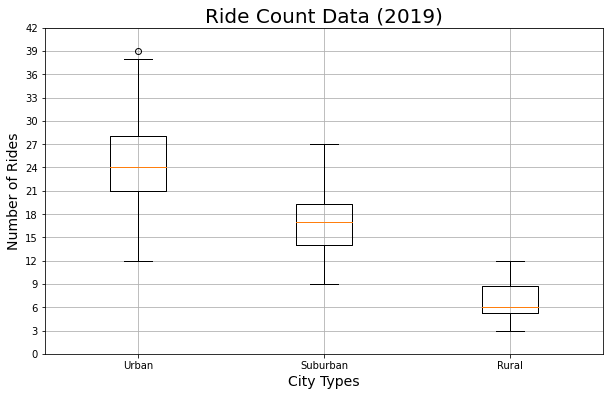

In [48]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban","Suburban","Rural"]
ridecounts = [urbanridecount, suburbanridecount, ruralridecount]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ridecounts, labels=x_labels)
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides",fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()
#Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [49]:
#Find the outlier that = 39
urbanoutlier = urbanridecount[urbanridecount==39].index[0]
print(f"{urbanoutlier} has the highest rider count.")

West Angela has the highest rider count.


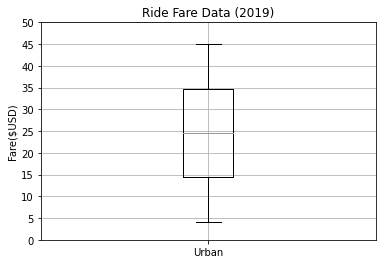

In [50]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urbanfares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

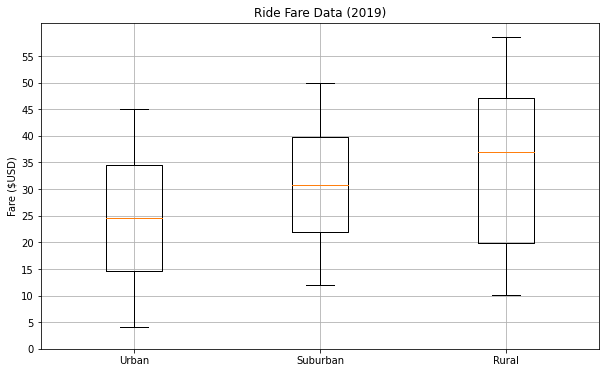

Summary Statistics


In [51]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban","Suburban","Rural"]
ridefares = [urbanfares, suburbanfares, ruralfares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ridefares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()
print("Summary Statistics")

In [52]:
urbanfares.describe()

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [53]:
suburbanfares.describe()

count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [54]:
ruralfares.describe()

count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

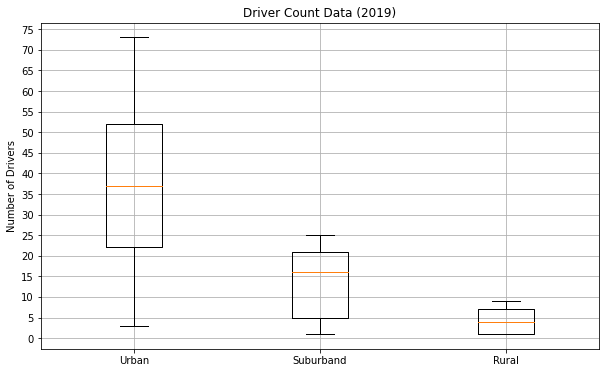

In [55]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban","Suburband","Rural"]
citydrivers = [urbandrivers, suburbandrivers, ruraldrivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(citydrivers, labels=x_labels)
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 76, step = 5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()

In [56]:
# Get the sum of the fares for each city type.
sumfaresbytype = pyberdata_df.groupby(["type"]).sum()["fare"]
sumfaresbytype

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [57]:
# Get the sum of all the fares.
totalfares = pyberdata_df["fare"].sum()
totalfares

63538.64

In [58]:
#Calculate the percentage of fare for each city type.
typepercents = 100 * sumfaresbytype / totalfares
typepercents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [59]:
#Refactor last 3 cells into one line of code.
typepercents = 100 * pyberdata_df.groupby(["type"]).sum()["fare"] / pyberdata_df["fare"].sum()
typepercents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

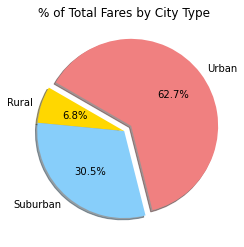

In [62]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Build the percentage of fares by city type pie chart.
plt.pie(typepercents, 
        labels=["Rural","Suburban","Urban"],
        colors=["gold","lightskyblue","lightcoral"],
        explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

#Change the default font size to 14.
mpl.rcParams["font.size"] = 14

#Save Figure
plt.savefig("analysis/Fig5.png")

plt.show()

In [63]:
#Refactor last 3 cells into one line of code.
ridepercents = 100 * pyberdata_df.groupby(["type"]).count()["ride_id"] / pyberdata_df["ride_id"].count()
ridepercents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

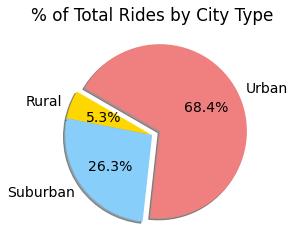

In [64]:
# Build the percentage of fares by city type pie chart.
plt.pie(ridepercents, 
        labels=["Rural","Suburban","Urban"],
        colors=["gold","lightskyblue","lightcoral"],
        explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

#Change the default font size to 14.
mpl.rcParams["font.size"] = 14

#Save Figure
plt.savefig("analysis/Fig6.png")

plt.show()

In [65]:
#Refactor last 3 cells into one line of code.
driverpercents = 100 * citydata_df.groupby(["type"]).sum()["driver_count"] / citydata_df["driver_count"].sum()
driverpercents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

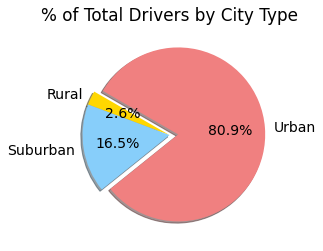

In [66]:
# Build the percentage of fares by city type pie chart.
plt.pie(driverpercents, 
        labels=["Rural","Suburban","Urban"],
        colors=["gold","lightskyblue","lightcoral"],
        explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

#Change the default font size to 14.
mpl.rcParams["font.size"] = 14

#Save Figure
plt.savefig("analysis/Fig7.png")

plt.show()